In [1]:
# Importing all the project pre-rquisites

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import keras
import matplotlib as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [2]:
# Importing dataset using short_name as df1

df1=pd.read_csv("PT_by_type_of_transport.csv")

In [3]:
df1.head()

,Bus,Underground,DLR,Overground
0,189.1,90.5,6.3,0.0
1,181.6,84.5,5.8,0.0
2,175.9,84.3,5.8,0.0
3,183.4,86.5,6.1,0.0
4,160.4,82.9,5.8,0.0


In [4]:
#Checking null values

total_null = df1.isnull().sum()
print("The total number of null values are: " + str(total_null))

The total number of null values are: Bus            0
Underground    0
DLR            0
Overground     0
dtype: int64


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bus          151 non-null    float64
 1   Underground  151 non-null    float64
 2   DLR          151 non-null    float64
 3   Overground   151 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<AxesSubplot:>

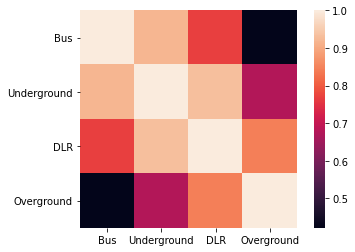

In [6]:
# check correlation of each values

corrmat = df1.corr()
sns.heatmap(corrmat, vmax=1, square=True)

<AxesSubplot:title={'center':'PT_by_type_of_transport'}>

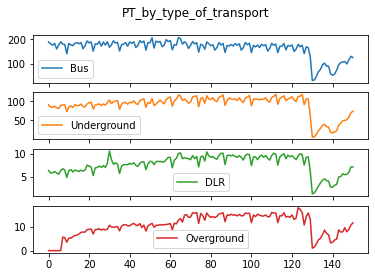

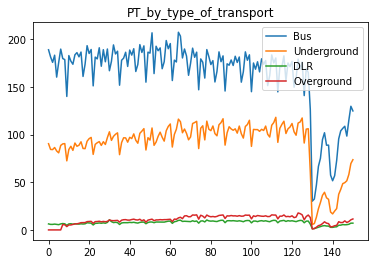

In [7]:
#Visualize the PT_by_type_of_transport data
df1.plot.line(subplots = True, title='PT_by_type_of_transport')
df1.plot(title='PT_by_type_of_transport')

In [8]:
#IQR Usage Rate by BUS

Q1 = np.percentile(df1['Bus'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df1['Bus'], 75, interpolation = 'midpoint')

IQR =Q3-Q1
print("IQR Usage Rate by BUS:",IQR)
print("Previous shape:",df1.shape)
#Upper bound
upper = np.where(df1['Bus'] >= (Q3+1.5*IQR))
#Lower Bound
lower = np.where(df1['Bus'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)

print("New Shape:", df1.shape)

IQR Usage Rate by BUS: 24.149999999999977
Previous shape: (151, 4)
New Shape: (132, 4)


In [9]:
#IQR London Underground (includes DLR up to Mar-17)

Q1 = np.percentile(df1['Underground'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df1['Underground'], 75, interpolation = 'midpoint')

IQR =Q3-Q1
print("IQR Usage Rate by London Underground :",IQR)
print("Previous shape:",df1.shape)
#Upper bound
upper = np.where(df1['Underground'] >= (Q3+1.5*IQR))
#Lower Bound
lower = np.where(df1['Underground'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)

print("New Shape:", df1.shape)

IQR Usage Rate by London Underground : 15.049999999999997
Previous shape: (132, 4)
New Shape: (131, 4)


In [10]:
#IQR Crime Rate by London DLR

Q1 = np.percentile(df1['DLR'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df1['DLR'], 75, interpolation = 'midpoint')

IQR =Q3-Q1
print("IQR Usage Rate by London DLR:",IQR)
print("Previous shape:",df1.shape)
#Upper bound
upper = np.where(df1['DLR'] >= (Q3+1.5*IQR))
#Lower Bound
lower = np.where(df1['DLR'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)

print("New Shape:", df1.shape)

IQR Usage Rate by London DLR: 2.1000000000000005
Previous shape: (131, 4)
New Shape: (131, 4)


In [11]:
#IQR Crime Rate by London overground

Q1 = np.percentile(df1['Overground'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df1['Overground'], 75, interpolation = 'midpoint')

IQR =Q3-Q1
print("IQR Usage Rate by London Overground:",IQR)
print("Previous shape:",df1.shape)
#Upper bound
upper = np.where(df1['Overground'] >= (Q3+1.5*IQR))
#Lower Bound
lower = np.where(df1['Overground'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)

print("New Shape:", df1.shape)

IQR Usage Rate by London Overground: 5.15
Previous shape: (131, 4)
New Shape: (124, 4)


In [12]:
#Normalize data

from sklearn import preprocessing 
import numpy as np

a = np.random.random((1,4))
a = a*20
print("Data = ", a)

#Normalize the data attributes
normalized = preprocessing.normalize(a)
print("Normalized Data =", normalized)

Data =  [[ 7.32671697 16.41413839  2.57652251 10.3972852 ]]
Normalized Data = [[0.35014535 0.78443513 0.12313255 0.49688845]]


In [30]:
#split dataset in features and target variable
x = df1[['Bus','Underground','Overground']]
y = df1[['DLR']]

In [31]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=42)

In [32]:
# feature scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [33]:
x

,Bus,Underground,Overground
7,179.9,90.3,5.6
8,178.8,90.6,5.4
9,140.1,72.5,3.5
10,183.0,84.4,5.2
11,177.2,87.8,5.2
...,...,...,...
126,141.0,91.2,10.6
127,169.4,105.8,14.1
128,165.2,106.2,15.6
149,129.8,69.7,10.6


In [34]:
y

,DLR
7,6.7
8,6.4
9,4.8
10,6.3
11,6.5
...,...
126,7.5
127,9.2
128,9.3
149,7.1


In [35]:
len(x_train)

91

In [36]:
len(x_test)

33

In [37]:
x_test

array([[ 1.06898112, -0.7407612 , -0.9585284 ],
       [ 0.75706456, -0.33185751, -0.57214486],
       [-0.61943678, -0.60113555, -0.47554897],
       [-0.61943678, -0.1323923 ,  0.68360165],
       [ 1.36733609,  1.10429204, -0.2823572 ],
       [ 0.77740694,  0.84498726,  1.13438244],
       [ 0.0586427 ,  0.5557627 , -0.31455583],
       [-3.09442687, -3.03461118, -0.47554897],
       [-0.69402552,  0.605629  ,  1.13438244],
       [ 0.11966985, -1.22945098, -2.2142749 ],
       [ 0.82487251,  0.17677879, -0.66874074],
       [-1.62299441,  0.02717988,  0.61920439],
       [ 2.1335659 ,  0.68541509, -0.25015857],
       [-0.45669771,  0.51586965,  0.65140302],
       [-0.24649307, -1.13969163, -1.15172017],
       [ 0.77740694,  1.02450595,  1.00558793],
       [-0.97203811, -1.45883598, -1.40930919],
       [ 0.16035462,  0.8848803 ,  0.87679342],
       [-0.10409638, -1.4787825 , -1.40930919],
       [ 0.10610826,  1.15415834,  0.87679342],
       [ 0.85877648, -0.19223186, -0.507

In [38]:
x_train

array([[-1.64333679, -2.07717814, -1.66689822],
       [-0.01594604,  0.59565574,  0.68360165],
       [ 0.98083079, -0.32188425, -1.02292565],
       [ 1.20459702,  0.61560226, -0.47554897],
       [-0.0701924 ,  0.17677879,  0.87679342],
       [ 0.46549038,  0.59565574,  0.87679342],
       [ 0.32987449, -0.34183077, -0.44335034],
       [-2.05696527, -1.23942424, -0.15356269],
       [ 0.1874778 ,  0.00723335, -0.21795995],
       [ 0.76384535, -0.76070772, -1.44150782],
       [ 0.90624204, -0.29196447, -0.57214486],
       [-0.89066857, -0.55126925,  0.55480713],
       [ 1.27240496, -0.19223186, -0.76533663],
       [ 0.0518619 ,  1.73260746,  1.1987797 ],
       [-1.59587123, -2.10709793, -1.24831605],
       [ 0.75706456,  1.38354334,  1.1987797 ],
       [ 0.180697  ,  1.04445247,  1.06998519],
       [-0.10409638, -1.65830119, -2.02108313],
       [ 0.39090164,  1.25389095,  1.10218381],
       [-1.08731162, -0.56124251,  0.16842359],
       [ 0.73672218,  0.35629748, -0.797

In [39]:
y_train

,DLR
22,5.2
118,9.7
29,7.9
47,8.2
88,9.6
...,...
113,7.5
21,7.1
99,9.8
58,8.7


In [40]:
y_test

,DLR
25,7.3
49,7.8
43,7.5
83,8.8
60,9.2
97,9.6
63,9.0
149,7.1
128,9.3
11,6.5
